# Data Cleaning

This notebook contains the code used for cleaning the "HK_AirBnB_Data_raw.csv" data, exporting it into the "cleaned_HK_AirBnB_Data.csv".

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Exploration

In [48]:
# read the raw data
df = pd.read_csv("../dat/HK_AirBnB_Data_raw.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,17891,Rental unit in Hong Kong Island · ★4.76 · Stud...,69063,Candace,NaN,Central & Western,22.28327,114.14988,Entire home/apt,NaN,60,73,2017-11-29,0.44,1,0,0,NaN
1,72571,Rental unit in Sheung Wan · ★4.22 · Studio · 1...,304876,Brendan,NaN,Central & Western,22.28463,114.15054,Entire home/apt,482.0,28,151,2022-03-11,0.97,9,0,0,NaN
2,132773,Rental unit in Hong Kong Island · ★4.52 · 2 be...,304876,Brendan,NaN,Central & Western,22.28921,114.14325,Entire home/apt,1475.0,5,247,2023-12-03,1.63,9,0,24,NaN
3,163664,Rental unit in Sheung Wan · ★4.28 · 2 bedrooms...,304876,Brendan,NaN,Central & Western,22.28494,114.14901,Entire home/apt,616.0,2,225,2021-02-16,1.50,9,0,0,NaN
4,163742,Rental unit in Sheung Wan · ★4.35 · 2 bedrooms...,304876,Brendan,NaN,Central & Western,22.28657,114.14889,Entire home/apt,1210.0,4,244,2023-11-20,1.62,9,336,10,NaN


In [49]:
# Get the shape of the table 

print(df.shape[0],df.shape[1])


7029 18


We have 7029 listings of Hongkong Airbnb and 18 features. 7 are caetgorical, 10 are continuous, and 1 is a date feature. 

In [50]:
# Get the missing values 
na_counts = df.isna().sum()
print(na_counts)

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group               7029
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                              477
minimum_nights                       0
number_of_reviews                    0
last_review                       3488
reviews_per_month                 3488
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           7029
dtype: int64


We can see that 4 variables have a lot of mising values (more than half of the data size). Speficially, "neighborhood_group" and "license" have no values recorded, thus we are not included them in our future analysis. Besides, we are not planning to use the date feature, so we choose to drop "last_review " as well. We also drop "reviews_per_month" as well because we have another variable "number_of_reviews" to represent similiar information about review numbers. 

Most importantly, we have 477 missing values for our predicted variable "price". Since it is not a big portion of our dataset, we decide to drop the rows with missing values as well. 

In [51]:
# drop the columns with missing values
df.drop(['neighbourhood_group', 'license', 'last_review', 'reviews_per_month'], axis=1, inplace=True)
# drop the observations with missing price
df = df.dropna(subset=['price'])

In [52]:
# Get the summary of numeircal data 
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,6.552000e+03,6.552000e+03,6552.000000,6552.000000,6552.000000,6552.000000,6552.000000,6552.000000,6552.000000,6552.000000
mean,3.864016e+17,1.626914e+08,22.296973,114.163868,891.273657,20.119505,14.185897,102.701923,231.399878,3.436203
std,4.427614e+17,1.796122e+08,0.033238,0.045559,2851.987331,36.765387,42.193088,138.481954,139.723222,8.699422
min,7.257100e+04,6.303800e+04,22.191250,113.856340,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,2.758918e+07,1.798524e+07,22.280565,114.159306,217.000000,1.000000,0.000000,4.000000,90.000000,0.000000
50%,4.445255e+07,9.313038e+07,22.292427,114.171555,499.000000,10.000000,0.000000,22.000000,271.000000,0.000000
75%,8.508944e+17,2.509951e+08,22.311020,114.180679,920.250000,29.000000,7.000000,136.000000,364.000000,2.000000
max,1.049754e+18,5.510371e+08,22.547197,114.362470,150000.000000,365.000000,511.000000,398.000000,365.000000,119.000000


From the summary, we can see that there is a wide range of price. Therefore, we might want to get rid of the outliers in case they affect our further analysis (at the end of the file). And the price is recorded as Hongkong Dollars. For convenience, we want to change it to US dollars.

In [53]:
# Change the price form HKD to USD
df['price'] = df['price']*0.13

## Create clean variables

In [54]:
# count each room type
room_type_counts= df['room_type'].value_counts()

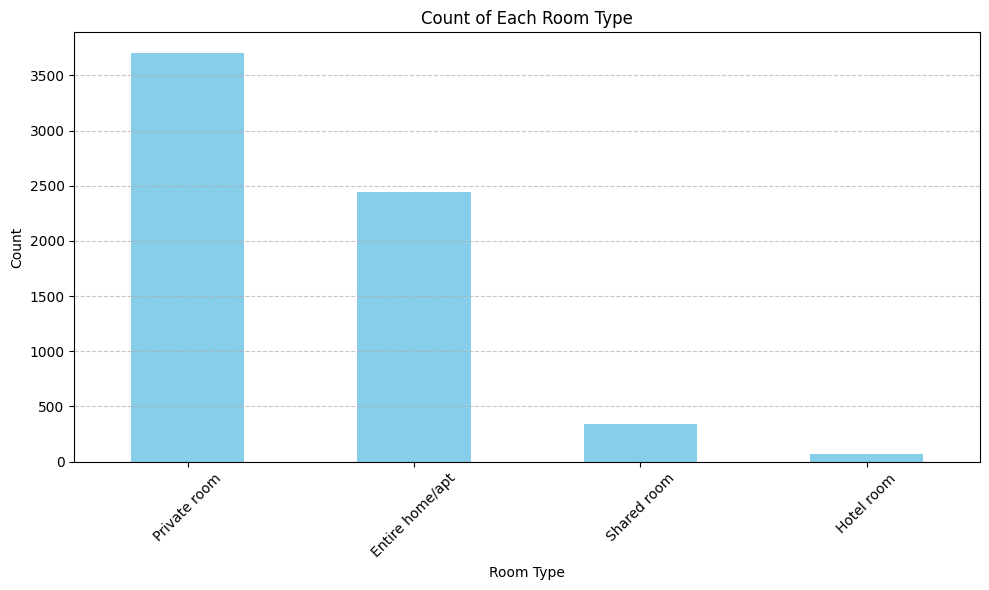

In [55]:
plt.figure(figsize=(10, 6))
room_type_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Each Room Type')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-labels for better readability if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [56]:
# one hot encode 'room_type' column
df = pd.get_dummies(df, columns=['room_type'])

In [57]:
# rename 'neighbourhood' into 'district'
df.rename(columns = {'neighbourhood': 'district'}, inplace = True)

In [58]:
# Create a function to split the information in "name" column into bed numbers, bath numbers, ratings, and bedroom numbers
def split_name(text):
    elements = re.split(r'\s*·\s*★?|\s*·\s*', text)
    return elements

def extract_last_element(series):
    return series.apply(lambda x: x[-1] if isinstance(x, list) and len(x) > 0 else None)

def extract_second_last_element(series):
    return series.apply(lambda x: x[-2] if isinstance(x, list) and len(x) > 1 else None)

def extract_third_last_element(series):
    return series.apply(lambda x: x[-3] if isinstance(x, list) and len(x) > 2 else None)

def extract_first_element(series):
    return series.apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)

def extract_second_element(series):
    return series.apply(lambda x: x[1] if isinstance(x, list) and len(x) > 1 else None)

In [59]:
import re
df['name_temp'] = df['name'].apply(split_name)

df['num_baths'] = extract_last_element(df['name_temp'])
df['num_beds'] = extract_second_last_element(df['name_temp'])
df['num_bedrooms'] = extract_third_last_element(df['name_temp'])
df['name'] = extract_first_element(df['name_temp'])
df['rating'] = extract_second_element(df['name_temp'])


In [60]:
# Create a "bedroom_count" variable 

allowed_bedroom_counts = [
    "1 bedroom",
    "Studio",
    "2 bedrooms",
    "3 bedrooms",
    "4 bedrooms",
    "5 bedrooms",
    "6 bedrooms",
    "9 bedrooms",
    "7 bedrooms",
    "10 bedrooms",
    "8 bedrooms",
    "11 bedrooms"
]
# filter the df with useful information for bedroom count in the correct format
df = df[df['num_bedrooms'].isin(allowed_bedroom_counts)]
# Extract the number of the bedroom
df['bedroom_count'] = df['num_bedrooms'].replace('Studio', '0').str.extract('(\d+)').astype(int)
df.drop(['num_bedrooms'], axis=1, inplace=True)


In [61]:
from collections import Counter

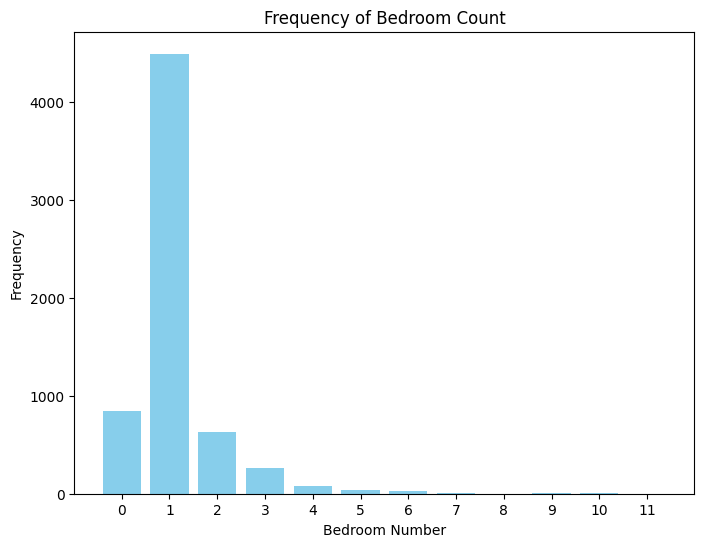

In [62]:
# Plot the bedroom count
number_counts = Counter(df['bedroom_count'])
bed_num = list(number_counts.keys())
freq = list(number_counts.values())
plt.figure(figsize=(8, 6))
plt.bar(bed_num, freq, color='skyblue')
plt.xlabel('Bedroom Number')
plt.ylabel('Frequency')
plt.title('Frequency of Bedroom Count')
plt.xticks(bed_num) 
plt.show()

In [63]:
# Create a "bathroom_count" variable
df['bathroom_count'] = df['num_baths'].str.replace('(?i)half-bath', '0.5', regex=True)
df['bathroom_count'] = df['bathroom_count'].str.extract('(\d+\.?\d*)').astype(float)
allowed_bathroom_counts = np.arange(0, 12, 0.5)
df = df[df['bathroom_count'].isin(allowed_bathroom_counts)]
df.drop(['num_baths'], axis=1, inplace=True)

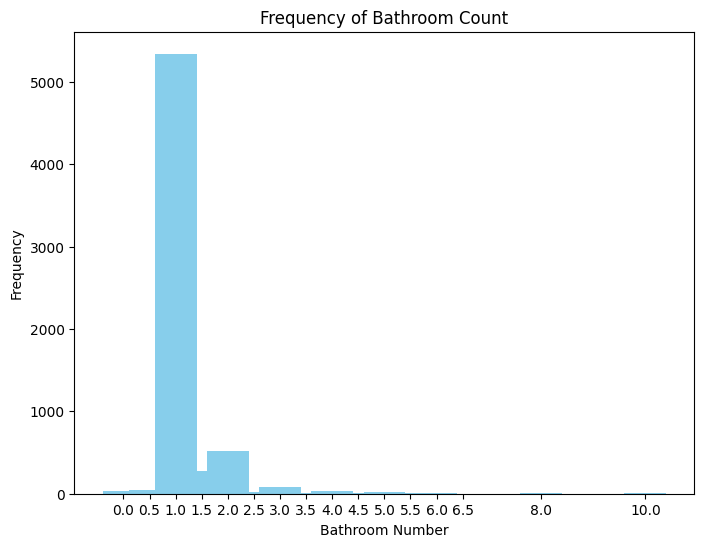

In [64]:
# Plot the bathroom count
number_counts = Counter(df['bathroom_count'])
bath_num = list(number_counts.keys())
freq = list(number_counts.values())
plt.figure(figsize=(8, 6))
plt.bar(bath_num, freq, color='skyblue')
plt.xlabel('Bathroom Number')
plt.ylabel('Frequency')
plt.title('Frequency of Bathroom Count')
plt.xticks(bath_num)  
plt.show()

In [65]:
# Create a "bed_count" variable

df['bed_count'] = df['num_beds'].str.extract('(\d+)').astype(int)
df.drop(['num_beds'], axis=1, inplace=True)


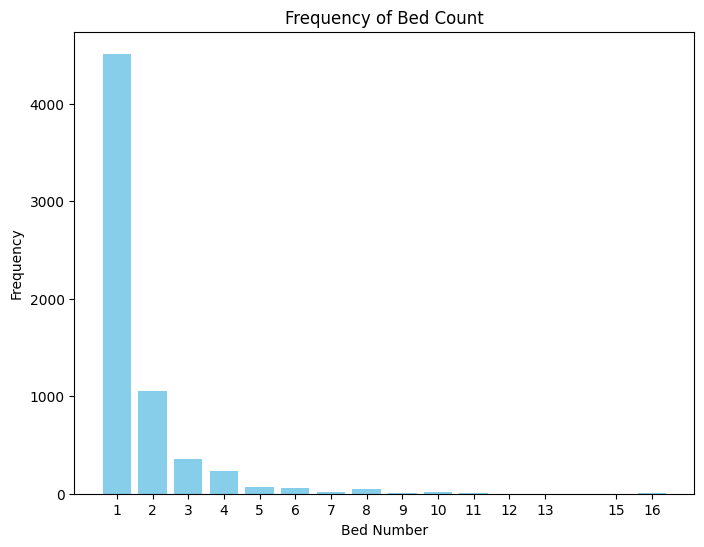

In [66]:
# Plot the bed count
number_counts = Counter(df['bed_count'])
bed_num = list(number_counts.keys())
freq = list(number_counts.values())
plt.figure(figsize=(8, 6))
plt.bar(bed_num, freq, color='skyblue')
plt.xlabel('Bed Number')
plt.ylabel('Frequency')
plt.title('Frequency of Bed Count')
plt.xticks(bed_num)  
plt.show()

In [67]:
# drop the rating because there are too many missinig values and drop other columns of no use
df.drop(['rating'], axis=1, inplace=True)
df.drop(['name_temp'], axis=1, inplace=True)

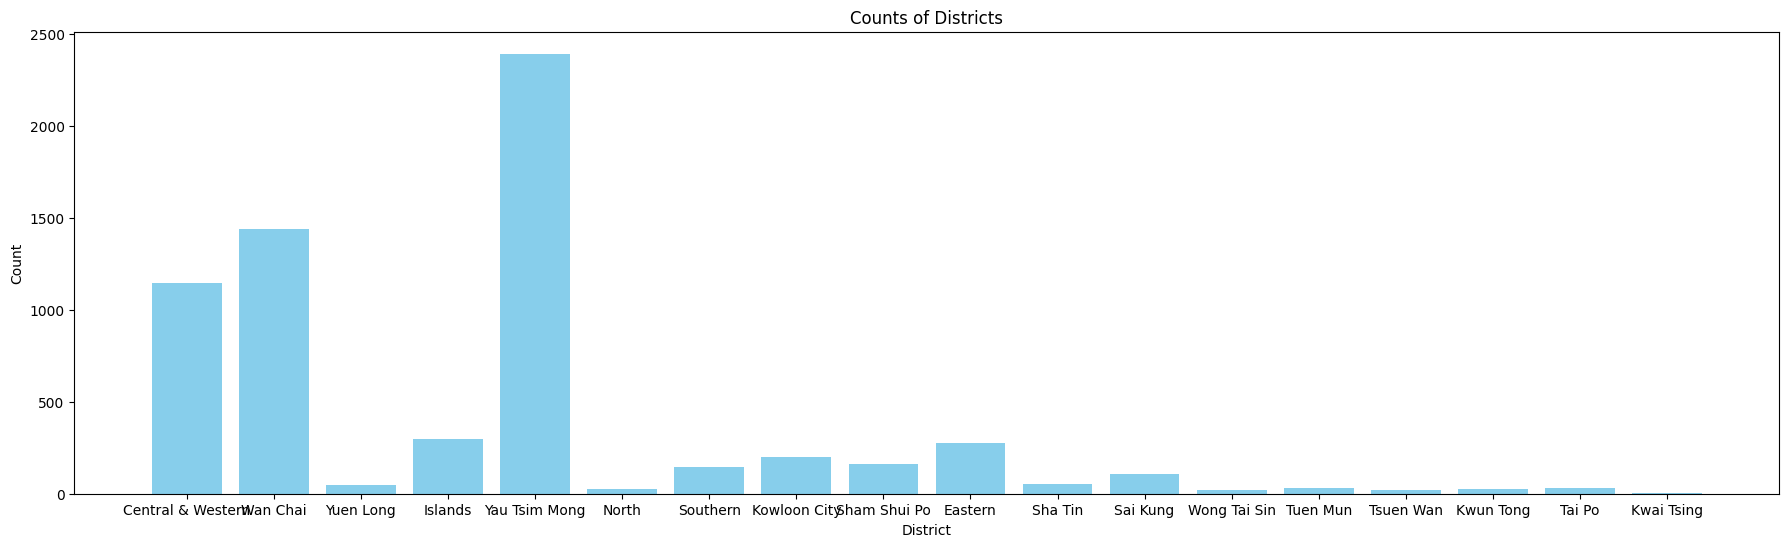

In [68]:
# Plot the distribution of districts
category_counts = Counter(df['district'])

categories = list(category_counts.keys())
counts = list(category_counts.values())

# Plotting the bar chart
plt.figure(figsize=(22, 6))
plt.bar(categories, counts, color='skyblue')
plt.xlabel('District')
plt.ylabel('Count')
plt.title('Counts of Districts')
plt.show()

In [69]:
# one hot encode district
df = pd.get_dummies(df, columns=['district'])

In [70]:
# Get the dimension of the cleaned data
df.shape

(6401, 37)

Now we have 6401 listings and 37 features. 

In [71]:
# export df
df.to_csv('cleaned_HK_AirBnB_Data.csv', index=False)

In [72]:
df_cleaned = pd.read_csv('cleaned_HK_AirBnB_Data.csv')

In [73]:
df_cleaned.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,...,district_Sha Tin,district_Sham Shui Po,district_Southern,district_Tai Po,district_Tsuen Wan,district_Tuen Mun,district_Wan Chai,district_Wong Tai Sin,district_Yau Tsim Mong,district_Yuen Long
count,6.401000e+03,6.401000e+03,6401.000000,6401.000000,6401.000000,6401.000000,6401.000000,6401.000000,6401.000000,6401.000000,...,6401.000000,6401.000000,6401.000000,6401.000000,6401.000000,6401.000000,6401.000000,6401.000000,6401.000000,6401.000000
mean,3.896137e+17,1.638663e+08,22.296758,114.163856,115.537099,20.173254,14.427121,102.754101,232.091704,3.488049,...,0.007968,0.024840,0.022496,0.004531,0.002968,0.004687,0.224965,0.003437,0.373535,0.007030
std,4.428742e+17,1.801158e+08,0.033124,0.045565,372.546979,37.092816,42.584963,138.605957,139.280361,8.776953,...,0.088912,0.155649,0.148303,0.067162,0.054405,0.068305,0.417592,0.058529,0.483780,0.083557
min,7.257100e+04,6.303800e+04,22.191250,113.856340,0.130000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.743928e+07,1.870760e+07,22.280510,114.159970,28.210000,1.000000,0.000000,4.000000,90.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.410688e+07,9.447404e+07,22.292250,114.171600,64.870000,12.000000,0.000000,22.000000,271.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.521771e+17,2.524692e+08,22.310851,114.180710,120.250000,29.000000,7.000000,136.000000,364.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.049754e+18,5.510371e+08,22.547197,114.362470,19500.000000,365.000000,511.000000,398.000000,365.000000,119.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [74]:
df_cleaned.drop(['id', 'name', 'host_id', 'host_name'], axis=1, inplace=True)

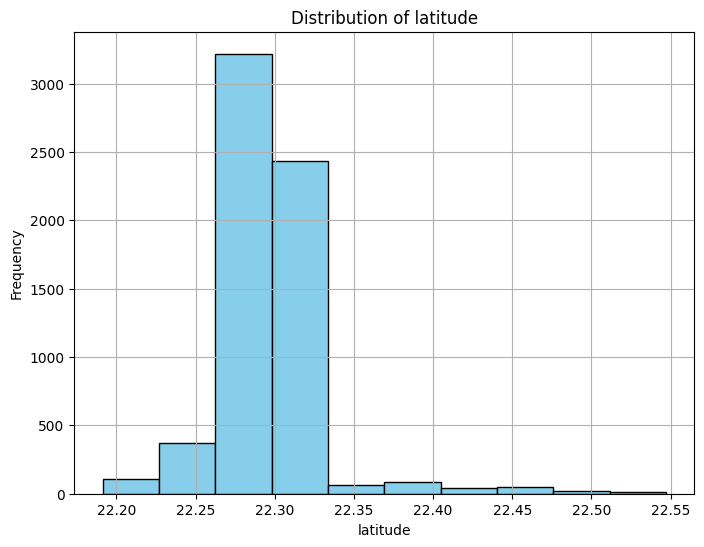

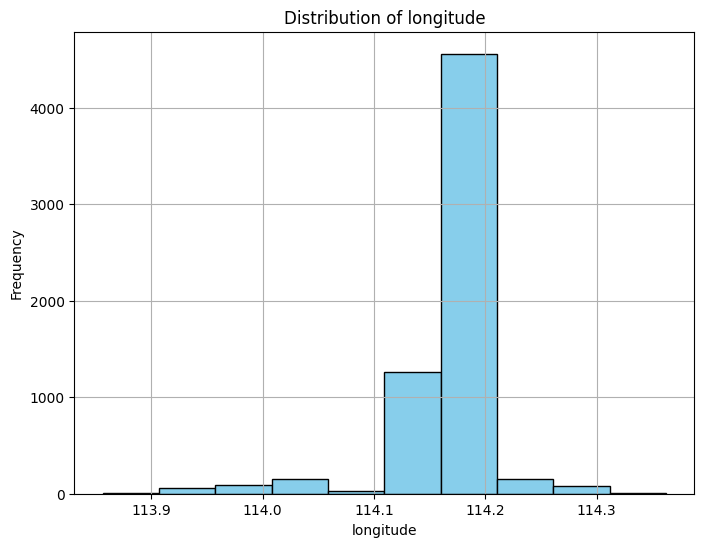

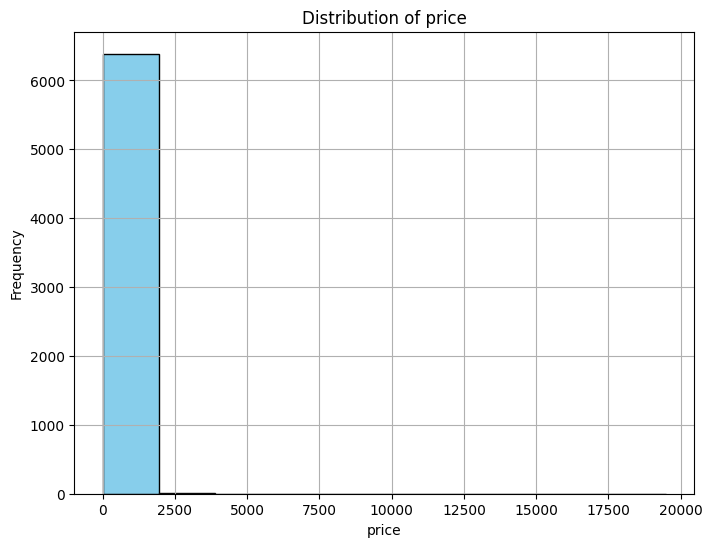

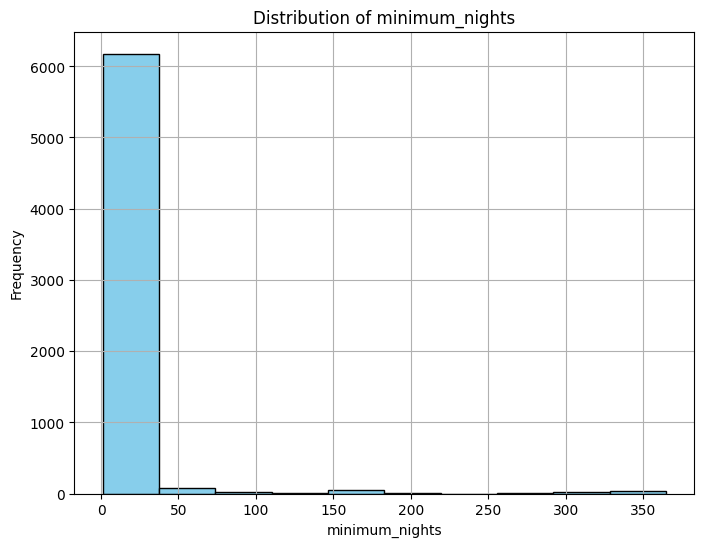

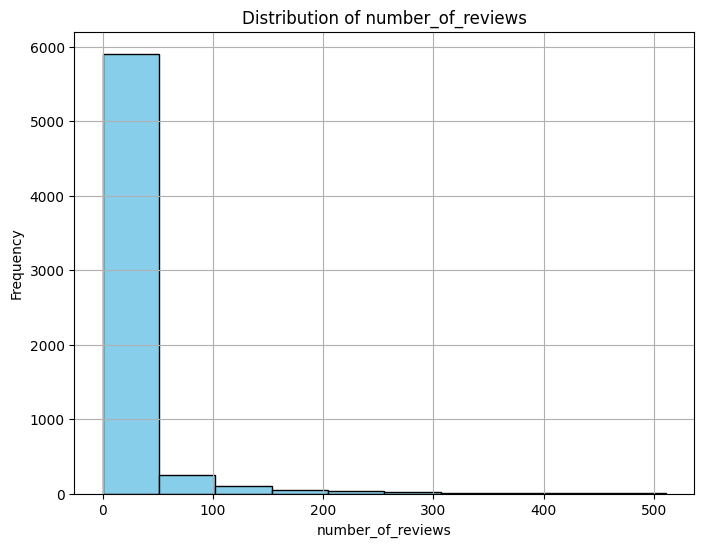

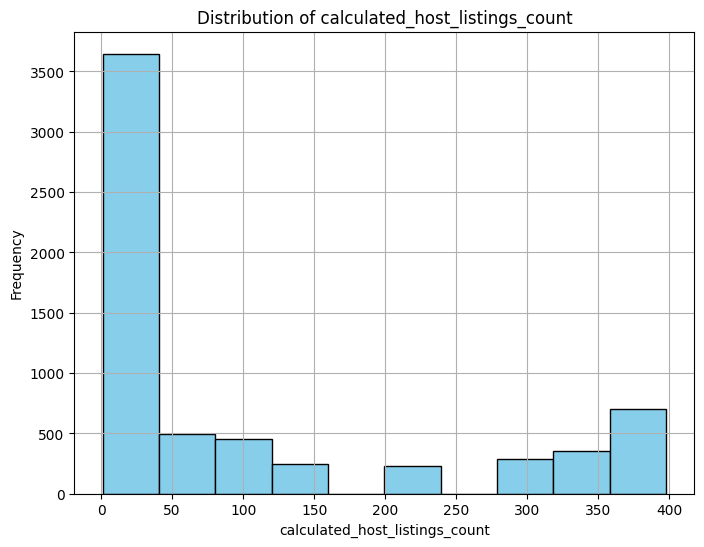

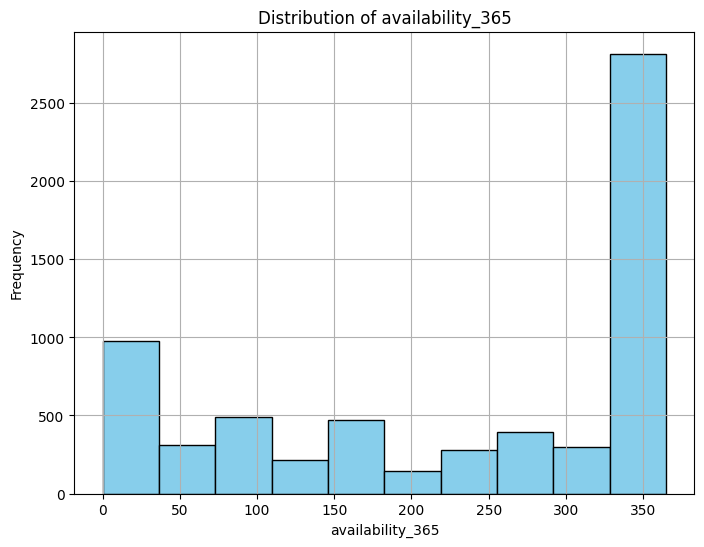

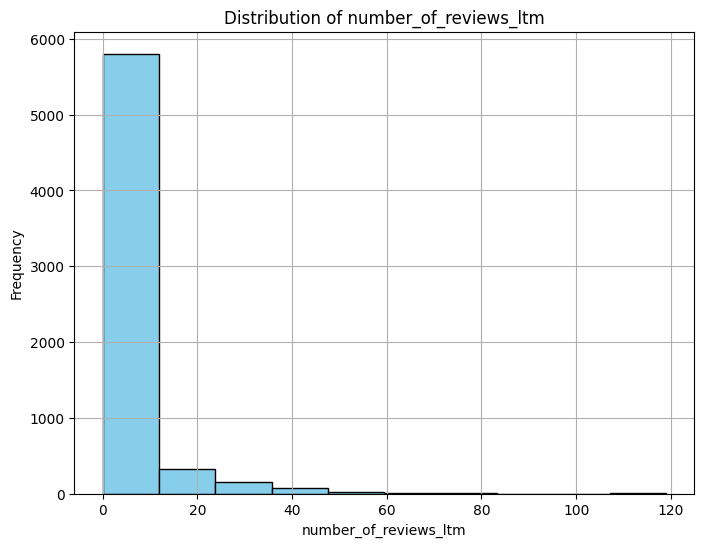

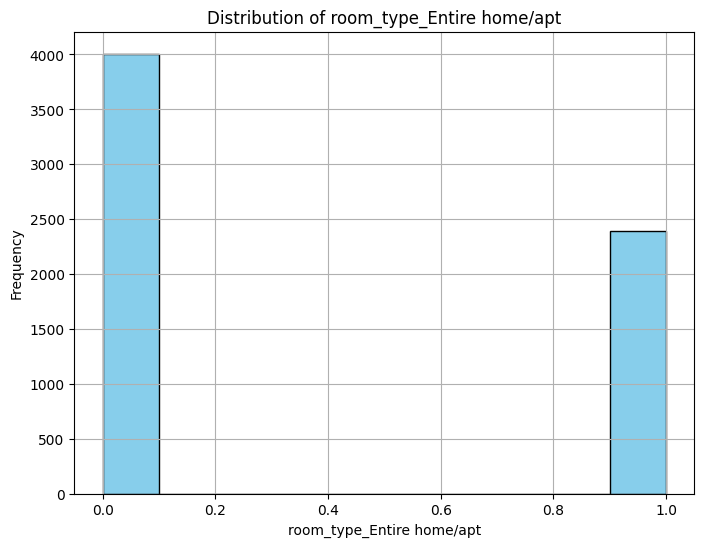

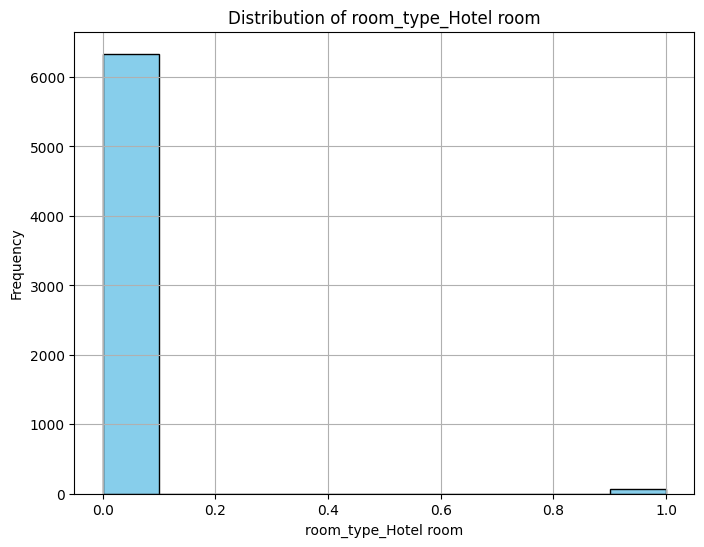

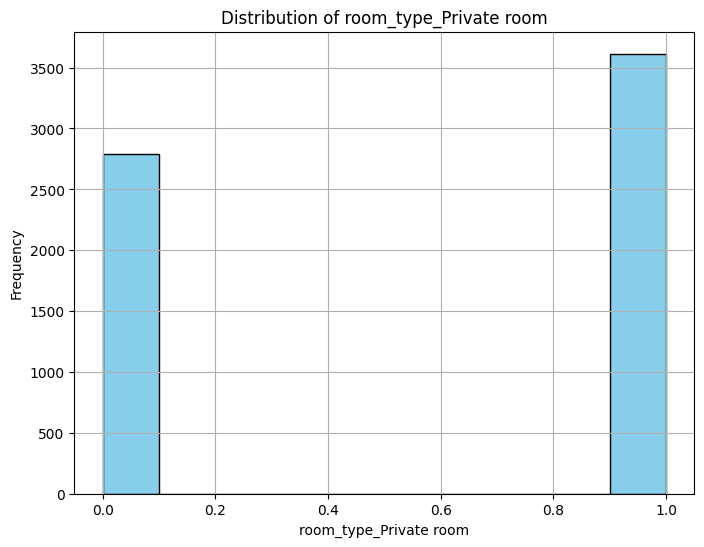

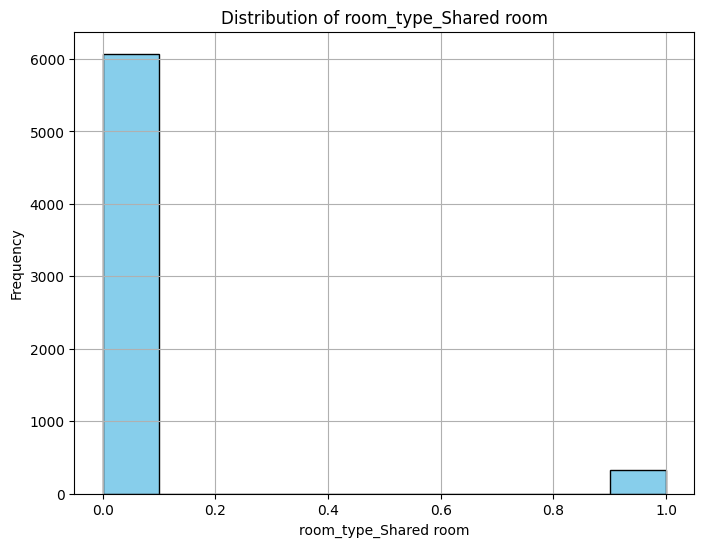

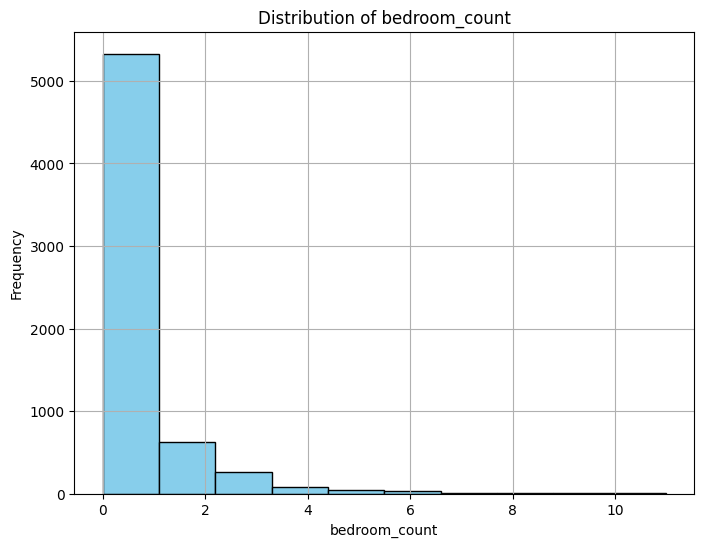

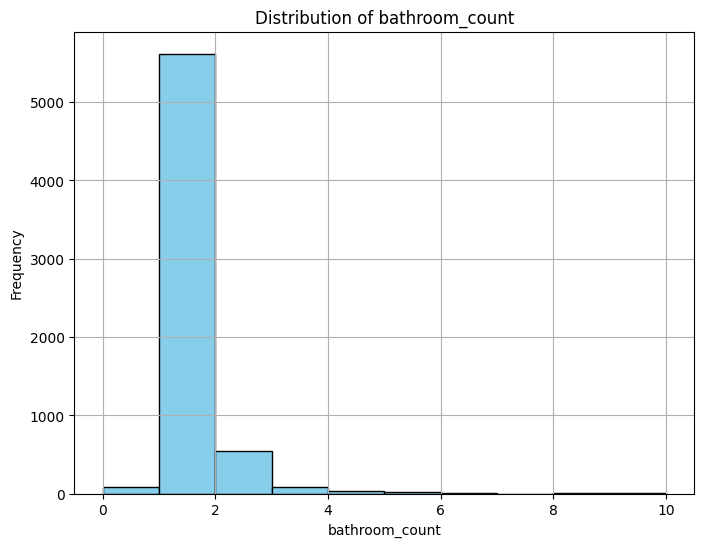

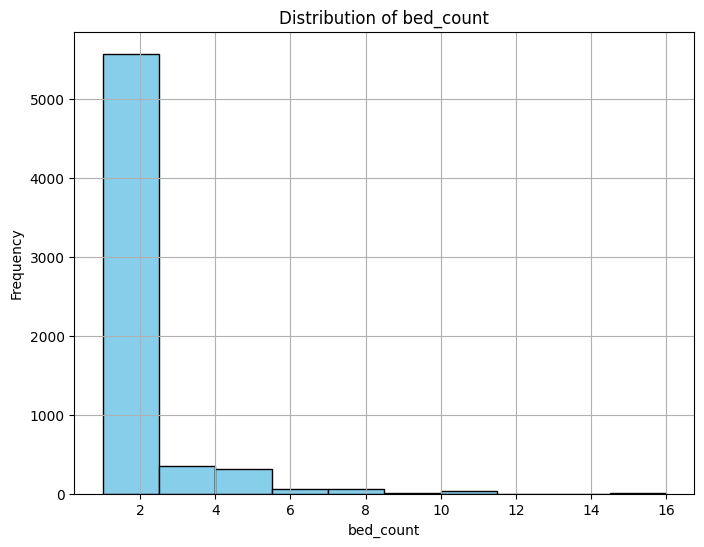

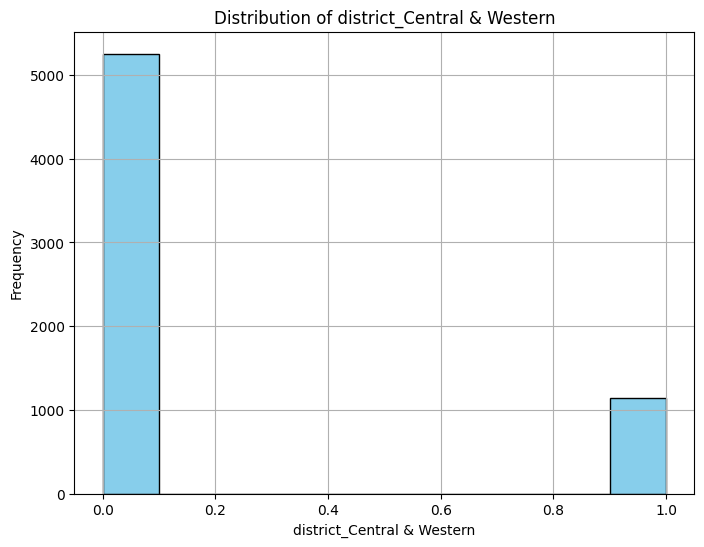

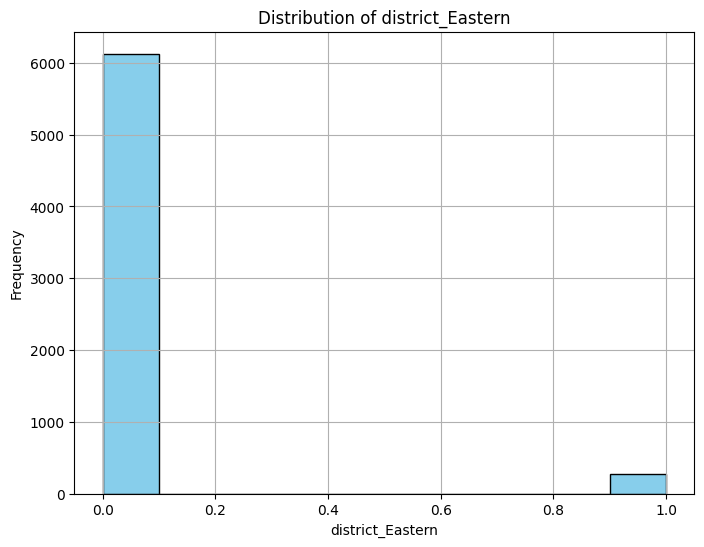

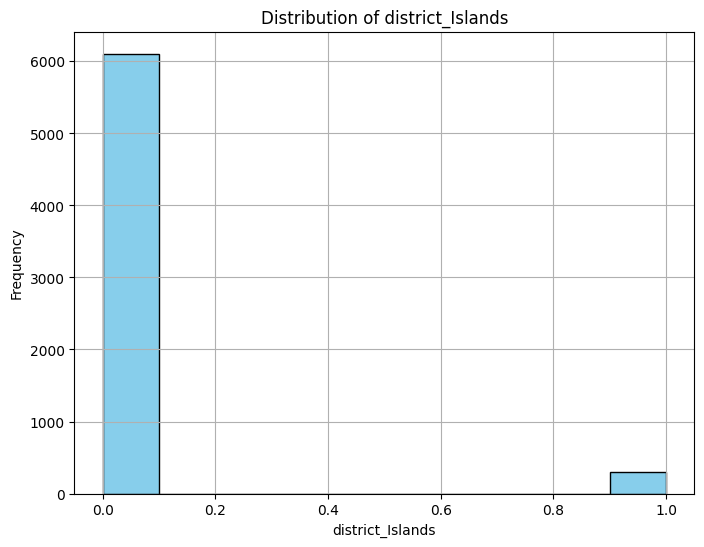

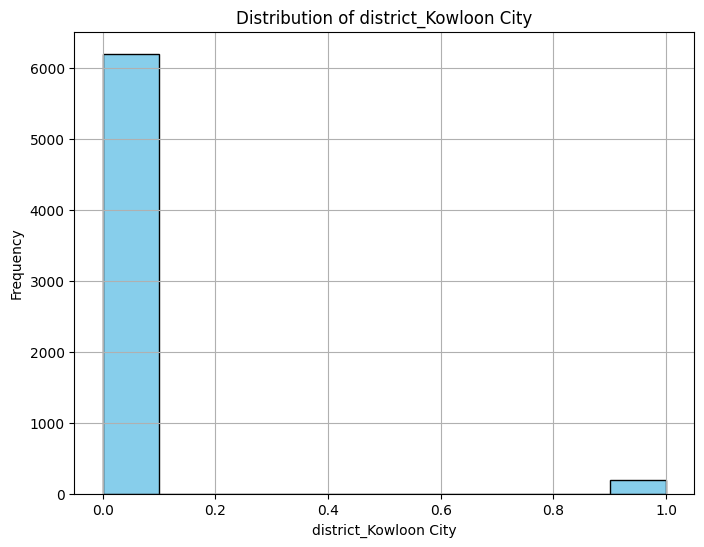

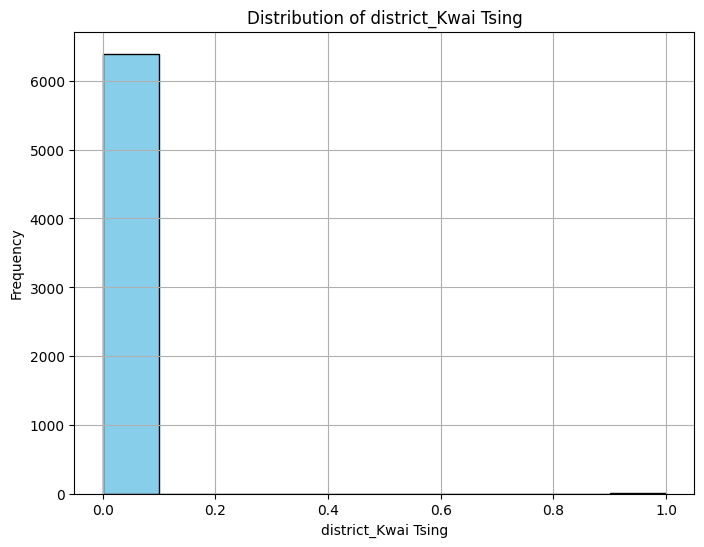

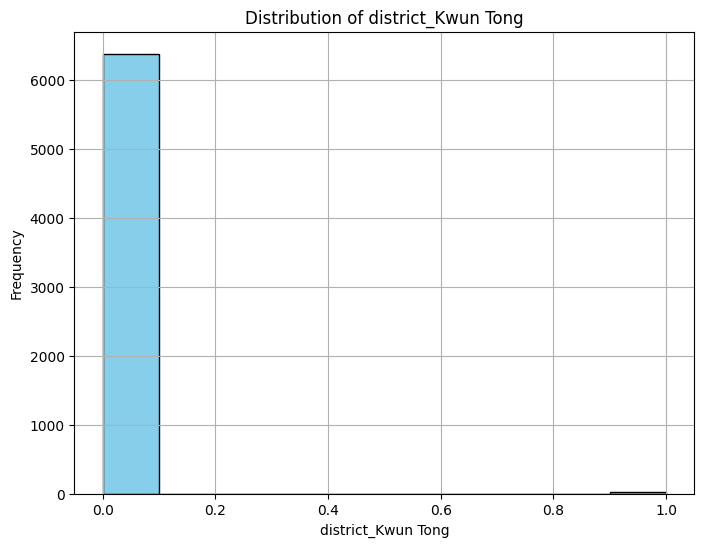

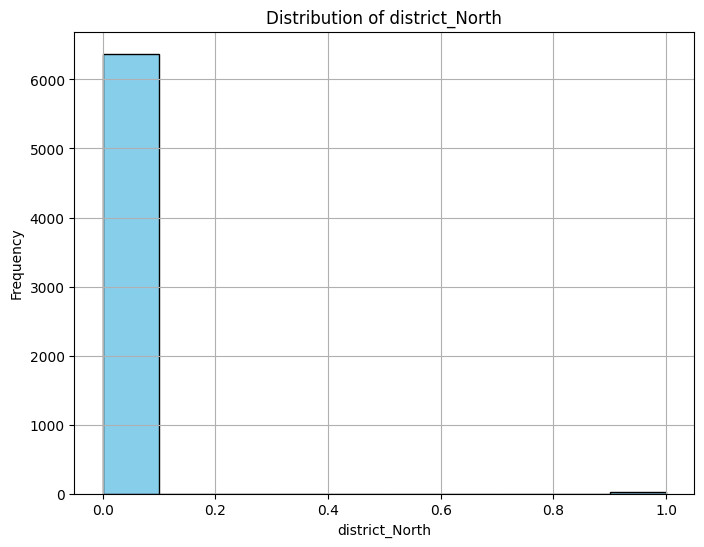

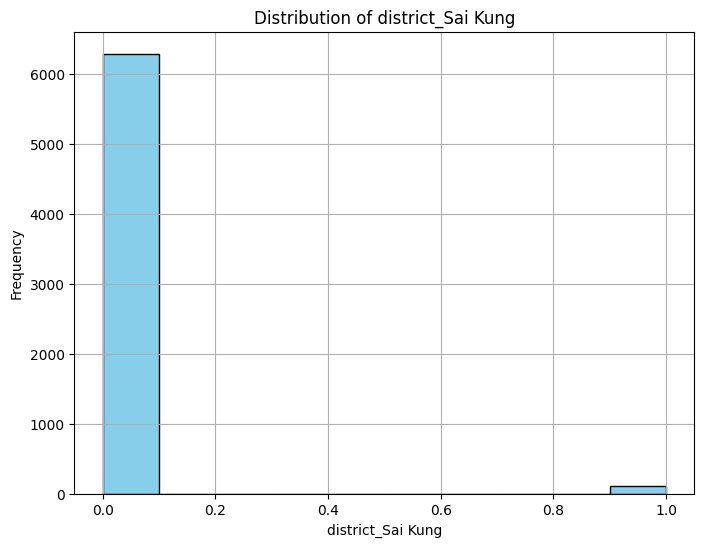

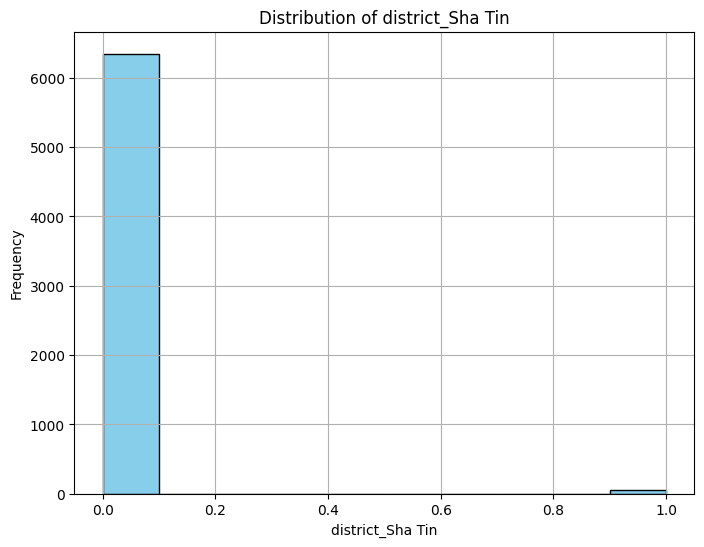

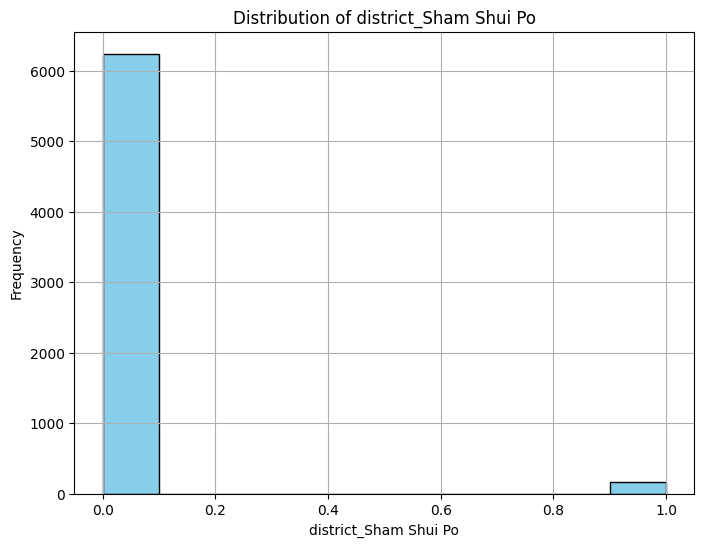

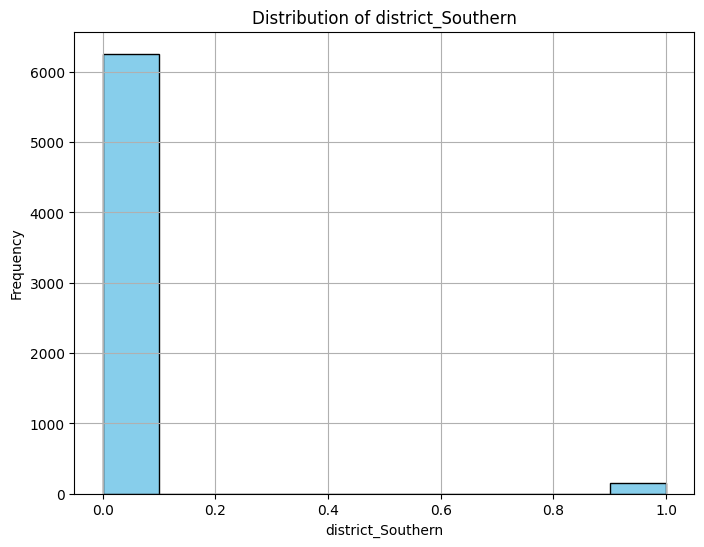

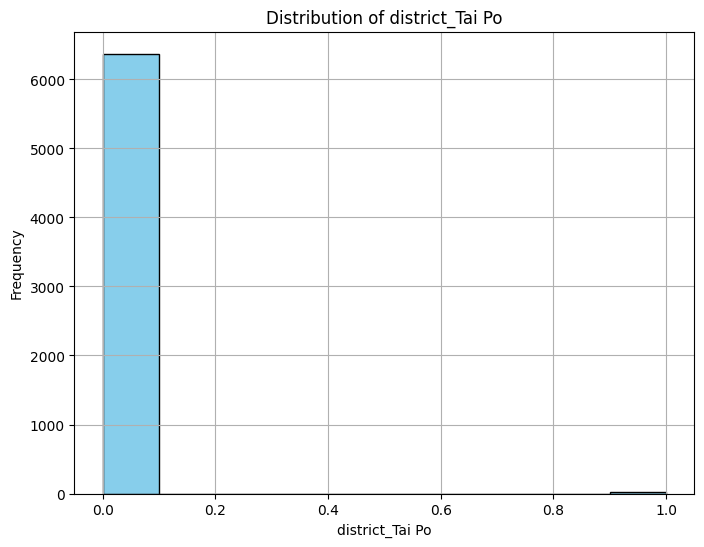

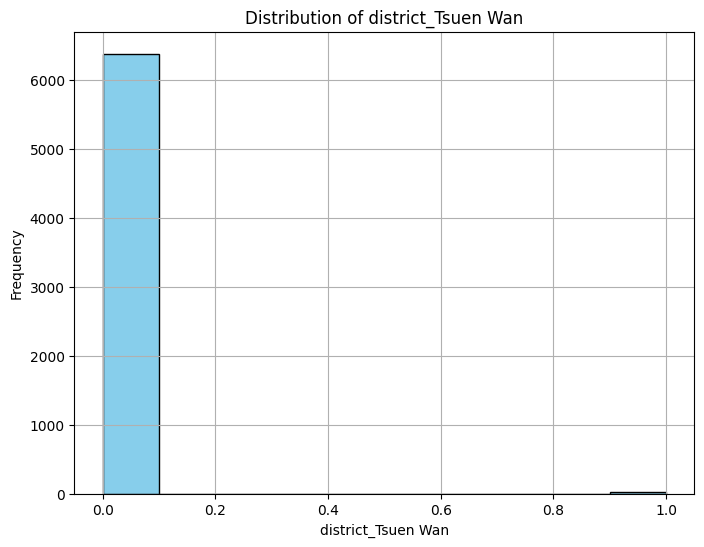

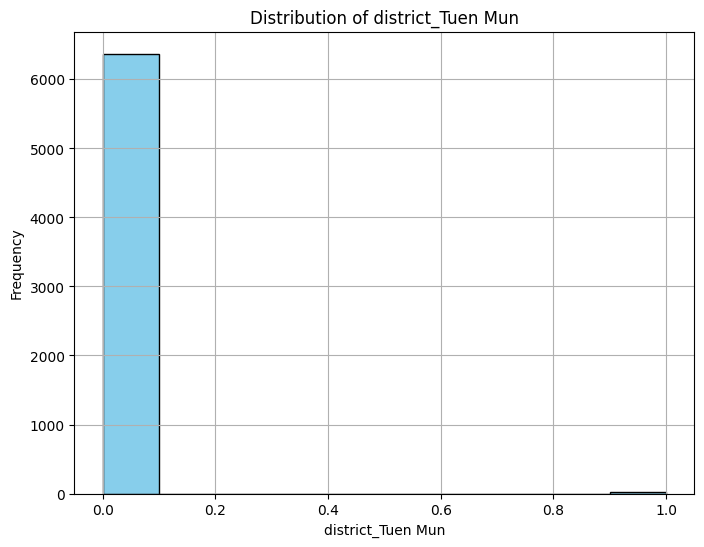

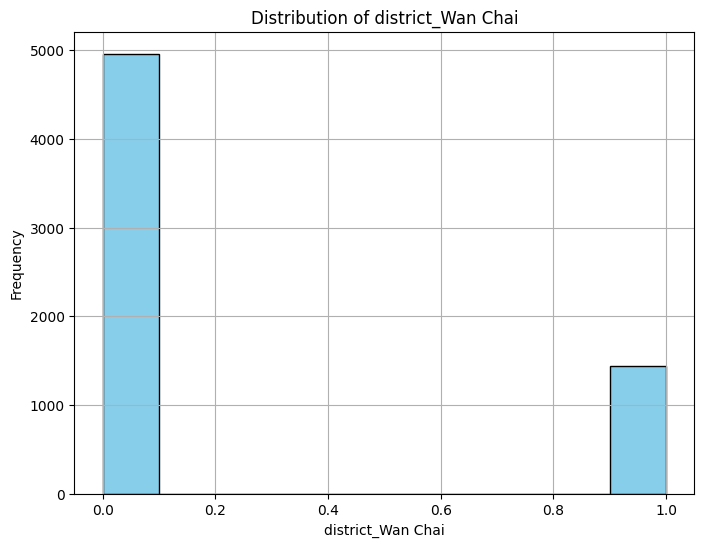

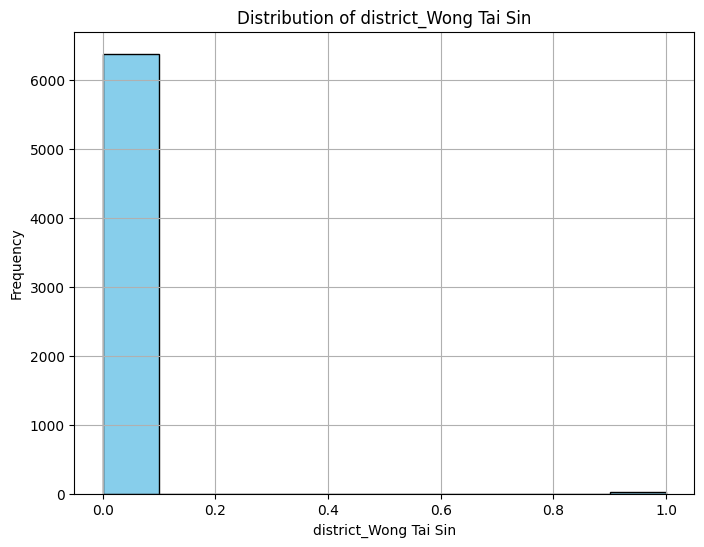

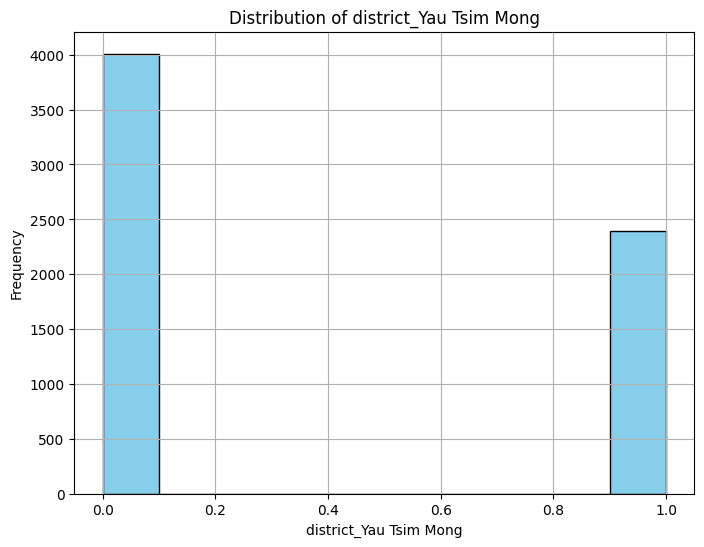

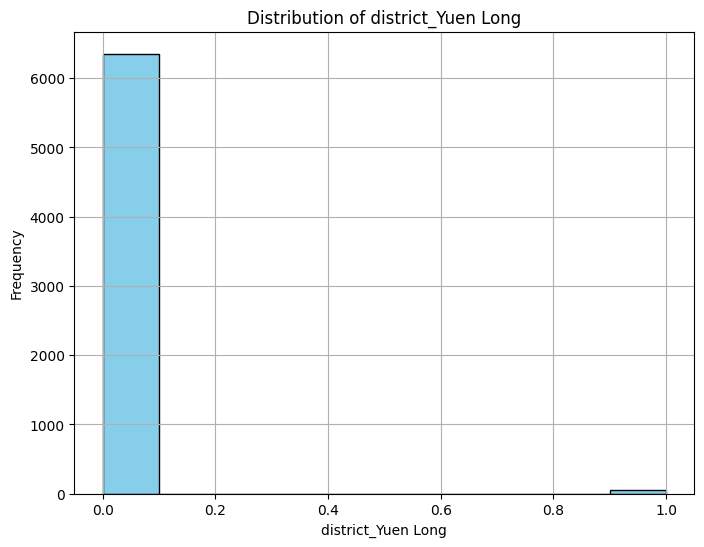

In [75]:
numeric_cols = df_cleaned.select_dtypes(include=['int', 'float']).columns

# Create plots for each numeric variable
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    plt.hist(df[col], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


In [76]:
# Get rid of the outliers 
q1 = np.percentile(df["price"], 25)
q3 = np.percentile(df["price"], 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print(lower_bound,upper_bound)
filtered_df = df[df['price']<= upper_bound]
filtered_df.drop(['id', 'name', 'host_id', 'host_name'], axis=1, inplace=True)

filtered_df.shape

-109.85 258.31


/var/folders/_t/gx7lwg7j49n2dxssfhd1fmvc0000gn/T/ipykernel_45985/3766881675.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop(['id', 'name', 'host_id', 'host_name'], axis=1, inplace=True)


(5940, 33)

In [77]:
# export filtered_df
filtered_df.to_csv('cleaned_HK_AirBnB_Data_no_outlier.csv', index=False)